Analyze the relationship between 'is_canceled' and 'adults', 'children', 'babies', 'country'.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

1. Load data

In [12]:
data = pd.read_csv('hotel_booking_data_cleaned.xls')

2. Calculate statistical indicators of each variable

In [13]:
statistics = data[['adults', 'children', 'babies', 'is_canceled']].describe()

print("Statistics:")
print(statistics)

Statistics:
              adults       children         babies    is_canceled
count  119390.000000  119386.000000  119390.000000  119390.000000
mean        1.856403       0.103890       0.007949       0.370416
std         0.579261       0.398561       0.097436       0.482918
min         0.000000       0.000000       0.000000       0.000000
25%         2.000000       0.000000       0.000000       0.000000
50%         2.000000       0.000000       0.000000       0.000000
75%         2.000000       0.000000       0.000000       1.000000
max        55.000000      10.000000      10.000000       1.000000


3. Cancellation rate

3.1 Calculate cancellation rate

In [14]:
cancellation_percentage = df['is_canceled'].value_counts(normalize = True)

not_cancelled_percentage = cancellation_percentage[0] * 100
cancelled_percentage = cancellation_percentage[1] * 100

print(f"No-Cancellation Ratio: {not_cancelled_percentage:.2f}%")
print(f"Cancellation Ratio: {cancelled_percentage:.2f}%")

No-Cancellation Ratio: 62.96%
Cancellation Ratio: 37.04%


3.2  Draw a bar chart of cancellation and non-cancellation

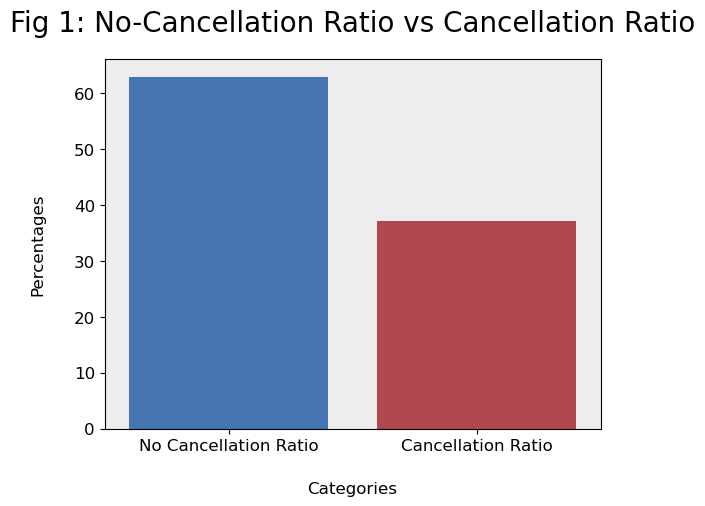

In [15]:
plt.rc('font', size=12)
plt.rc('axes', labelcolor='#000000')
plt.rc('text', color='#000000')
plt.rc('xtick', color='#000000')

categories = ['No Cancellation Ratio', 'Cancellation Ratio']
cancel_ratio = [not_cancelled_percentage, cancelled_percentage]
colors = ['#1069e8', '#e81123']
width = 0.5

ax = sns.barplot(x=categories, y=cancel_ratio, palette=colors, saturation=width)

plt.xlabel('Categories', labelpad=20)
plt.ylabel('Percentages', labelpad=20)
plt.title('Fig 1: No-Cancellation Ratio vs Cancellation Ratio', fontsize=20, pad=20)

ax.set_facecolor("#ededed")

plt.show()


4. Countries

4.1 Calculate cancellation rates for different countries

In [16]:
country_cancellations = data.groupby('country')['is_canceled'].mean()

4.2 Draw a histogram of reservation cancellation rates in different countries

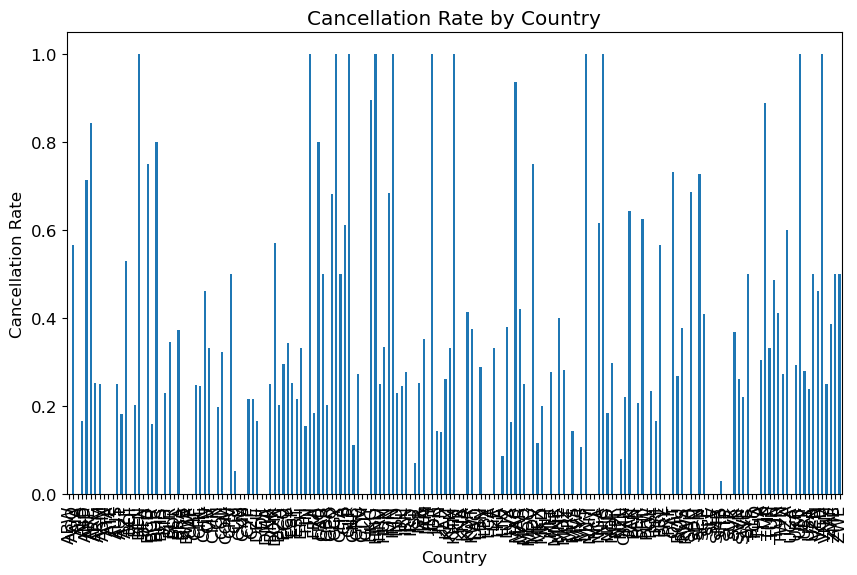

In [17]:
country_cancellations.plot(kind='bar', figsize=(10, 6))
plt.title('Cancellation Rate by Country')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.show()

4.3 Plot a pie chart of booking cancellation rates by country

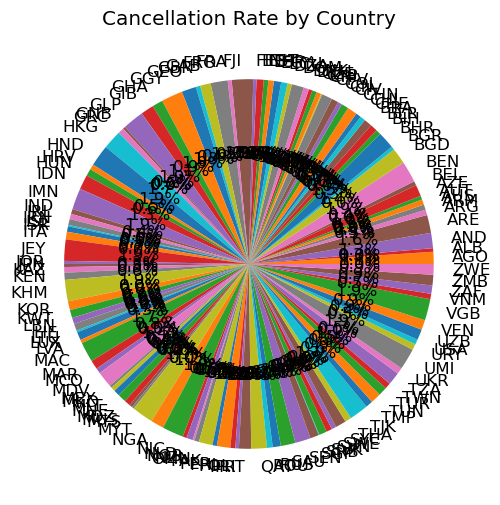

In [18]:
country_cancellations.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.title('Cancellation Rate by Country')
plt.ylabel('')
plt.show()

4.4 Top 5 countries with the highest number of cancellations

In [20]:
cancelled_data = data[data['is_canceled'] == 1]
top_5_countries = cancelled_data['country'].value_counts()[:5]

top_5_countries

PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
Name: country, dtype: int64

4.5 Top 5 countries with the highest cancellation rates

4.5 Let's visualize it with a Pie chart.

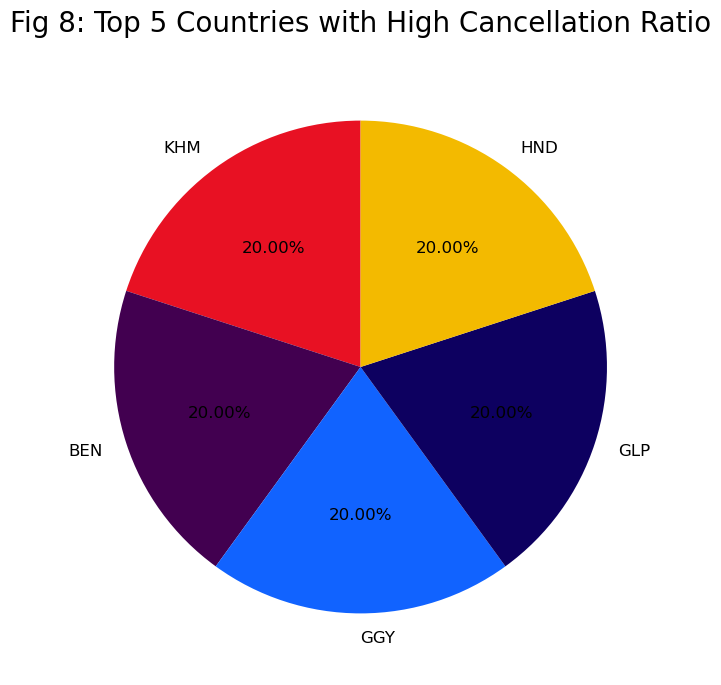

In [22]:
plt.rc('font', size=12)

colors = ['#e81123', '#420050', '#1163ff', '#0d0060', '#f3ba00']

plt.figure(figsize=(8, 8))
plt.title('Fig 8: Top 5 Countries with High Cancellation Ratio', fontsize=20, pad=20)
plt.pie(top_5_countries, autopct='%1.2f%%', labels=top_5_countries.index, colors=colors, 
        startangle=90)

plt.show()

5. Adults, children and babies

5.1 Plot a box plot of the number of adults, children and babies

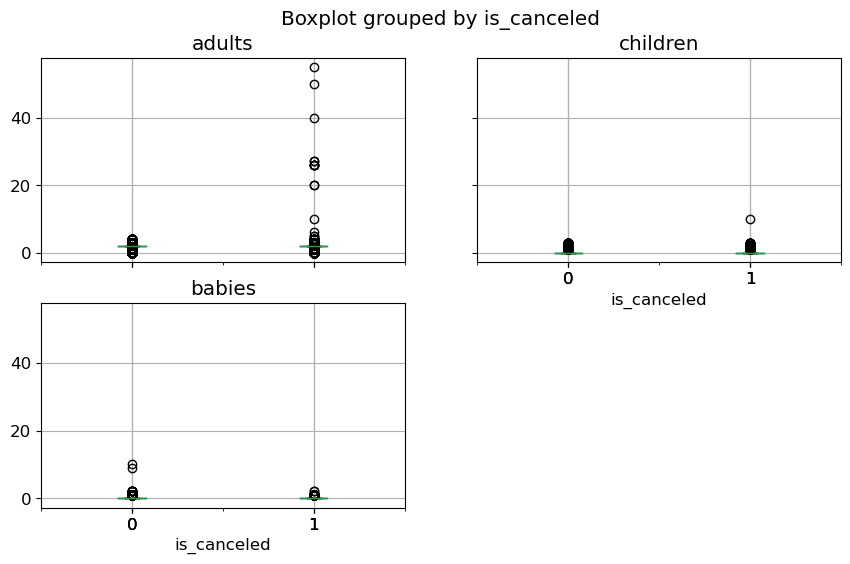

In [23]:
data.boxplot(column=['adults', 'children', 'babies'], by='is_canceled', figsize=(10, 6))
plt.title('Boxplot of Adults, Children, and Babies by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

5.2 Analyze the distribution chart of the number of carried babies and the ratio of is_canceled.

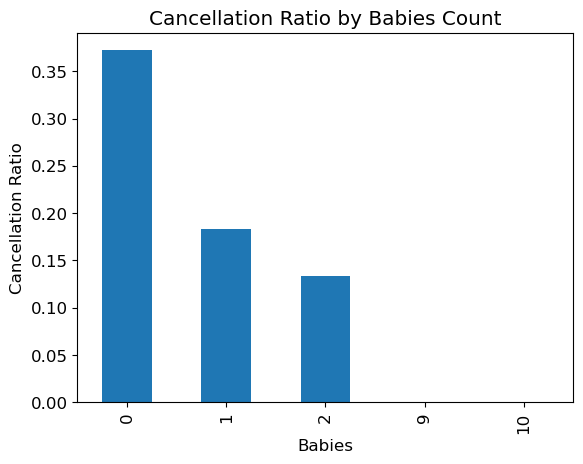

In [24]:
# Calculate the ratio of is_canceled to 1 for each number of babies
babies_counts = df['babies'].value_counts()
babies_cancelled = df[df['is_canceled'] == 1]['babies'].value_counts()
cancel_ratio = babies_cancelled / babies_counts

# Draw a histogram
cancel_ratio.plot(kind='bar')
plt.xlabel('Babies')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Babies Count')
plt.show()

As can be seen from the figure, the greater the number of babies, the lower the cancellation rate.

5.3 Analyze the distribution chart of the number of children and the ratio of is_canceled.

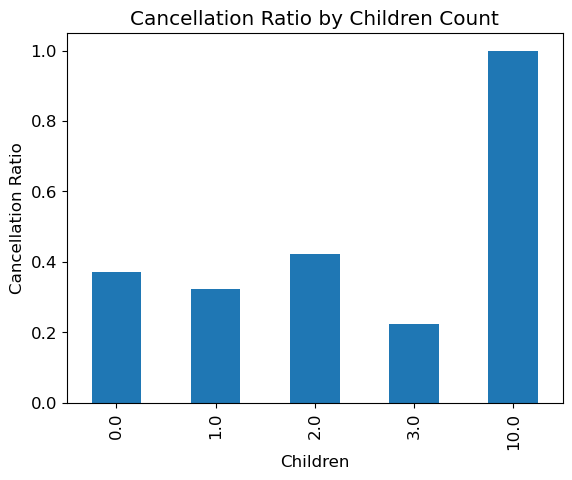

In [25]:
# Calculate the ratio of is_canceled to 1 for each number of babies
children_counts = df['children'].value_counts()
children_cancelled = df[df['is_canceled'] == 1]['children'].value_counts()
cancel_ratio = children_cancelled / children_counts

# Draw a histogram
cancel_ratio.plot(kind='bar')
plt.xlabel('Children')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Children Count')
plt.show()

When the number of children is 10, it is a special situation. This is just one example. After excluding this special situation and 
looking at the picture again, we find that the number of children has little impact on the cancellation rate and there is no 
special rule.

5.4 Analyze the distribution of the sum of the number of children plus babies and the cancellation rate.

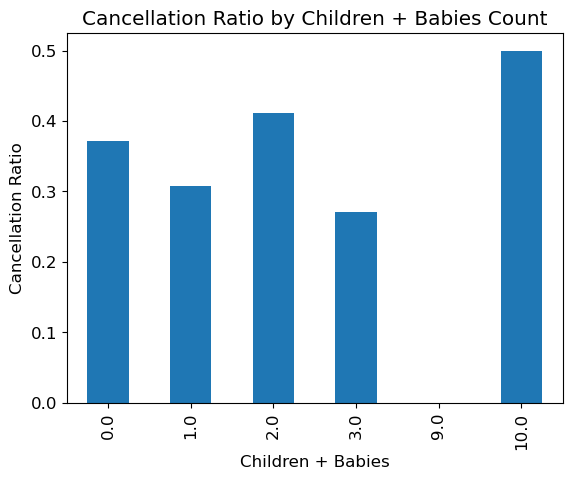

In [26]:
# Calculate the ratio of is_canceled to 1 corresponding to the sum of the numbers of each children and babies
df['children_babies_sum'] = df['children'] + df['babies']
sum_counts = df['children_babies_sum'].value_counts()
sum_cancelled = df[df['is_canceled'] == 1]['children_babies_sum'].value_counts()
cancel_ratio = sum_cancelled / sum_counts

# Draw a histogram
cancel_ratio.plot(kind='bar')
plt.xlabel('Children + Babies')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Children + Babies Count')
plt.show()

After adding the number of children and the number of babies, there is no obvious pattern.

5.5 Analyze the distribution chart of the number of adults and the ratio of is_canceled.

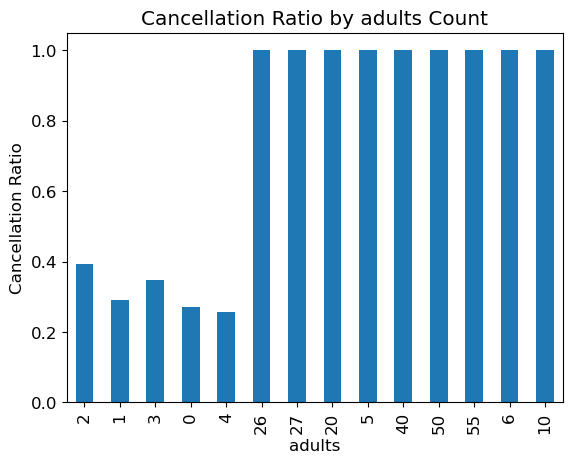

In [27]:
# Calculate the ratio of is_canceled to 1 for each number of adults
adults_counts = df['adults'].value_counts()
adults_cancelled = df[df['is_canceled'] == 1]['adults'].value_counts()
cancel_ratio = adults_cancelled / adults_counts

# Draw a histogram
cancel_ratio.plot(kind='bar')
plt.xlabel('adults')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by adults Count')
plt.show()